In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer

In [ ]:
data=pd.read_csv('titanic.csv')

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<ipython-input-43-0ca8d90c823b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Greens')


<Axes: >

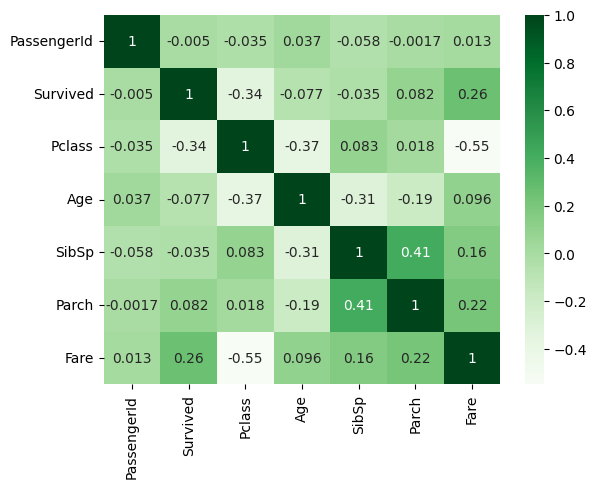

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Greens')

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
index = data.isna().any(axis=1)
data[index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
data=data.drop(['Name','Cabin','Ticket'],axis=1)
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna('U')

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

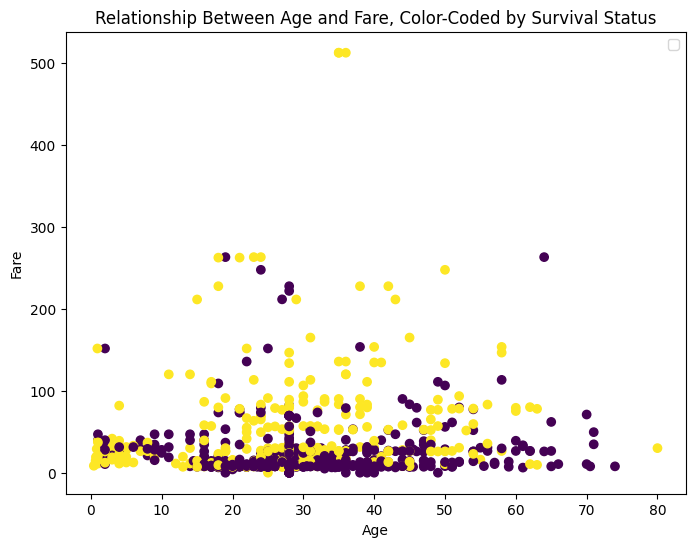

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data["Age"], data["Fare"], c=data["Survived"], cmap="viridis")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship Between Age and Fare, Color-Coded by Survival Status")

# Add legend
plt.legend()

# Show the plot
plt.show()

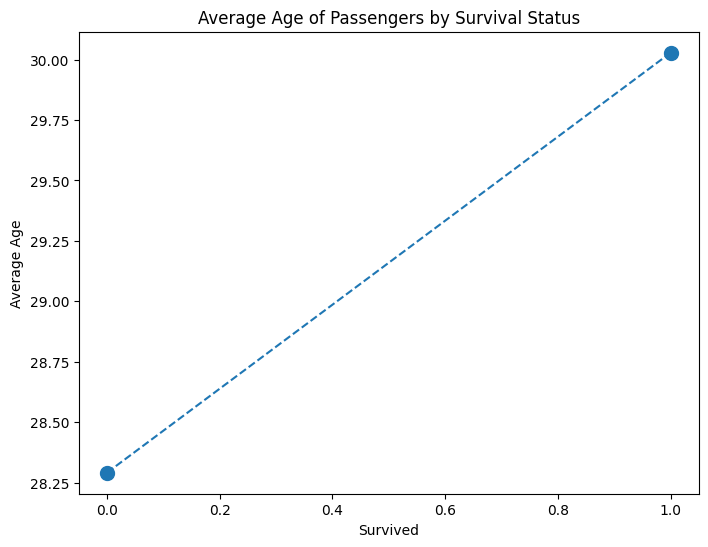

In [ ]:
avg_age_survived = data[data["Survived"] == 1]["Age"].mean()
avg_age_not_survived = data[data["Survived"] == 0]["Age"].mean()
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [avg_age_survived, avg_age_not_survived], linestyle="--", marker="o", markersize=10)
plt.xlabel("Survived")
plt.ylabel("Average Age")+
plt.title("Average Age of Passengers by Survival Status")
plt.show()

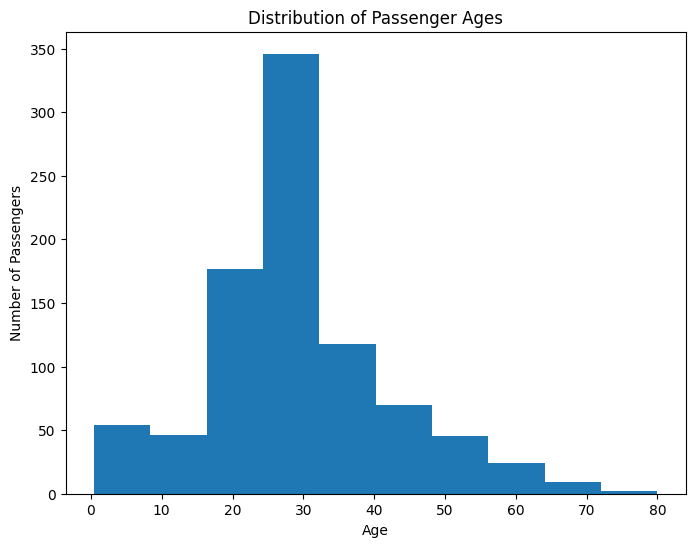

In [ ]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(data["Age"])

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Ages")

# Show the plot
plt.show()

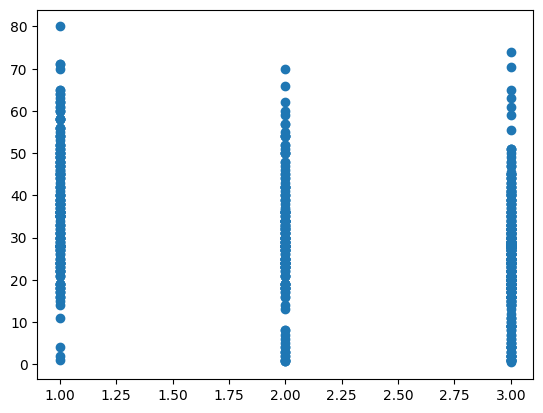

In [ ]:
plt.scatter(data['Pclass'],data['Age'])
plt.show()

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data=pd.get_dummies(data,columns=['Sex','Embarked'])
data=data.drop('Embarked_U',axis=1)
cols=['PassengerID','Class','Age','SibSp','Parch','Fare','Female','Male','C','Q','S']
data.columns=['PassengerID','Survived','Class','Age','SibSp','Parch','Fare','Female','Male','C','Q','S']
data.head()

,PassengerID,Survived,Class,Age,SibSp,Parch,Fare,Female,Male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
#Split data into training and testing sets
x=data.drop(['Survived'],axis=1)
y=data['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
ct=make_column_transformer((MinMaxScaler(),cols),(StandardScaler(),cols), remainder='passthrough')

xtrain = ct.fit_transform(xtrain)
xtest = ct.transform(xtest)

In [ ]:
rand=RandomForestClassifier()
para=[{'n_estimators': [500,1000], 'max_depth': [None,5,10], 'min_samples_split': [2,3,4]}]

grid=GridSearchCV(rand,para,cv=3,scoring='accuracy',return_train_score=True)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
rand1=grid.best_estimator_
rand1

RandomForestClassifier(max_depth=10, n_estimators=500)

In [ ]:
rand1.score(xtrain,ytrain)

0.9562289562289562

In [ ]:
pred=rand1.predict(xtest)
pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

In [ ]:
final=pd.DataFrame(data["PassengerID"].tail(268))
final['Survived']=pred
final.to_csv('predictions.csv',index=False)

In [ ]:
final

,PassengerID,Survived
623,624,0
624,625,0
625,626,0
626,627,1
627,628,0
...,...,...
886,887,0
887,888,0
888,889,0
889,890,0


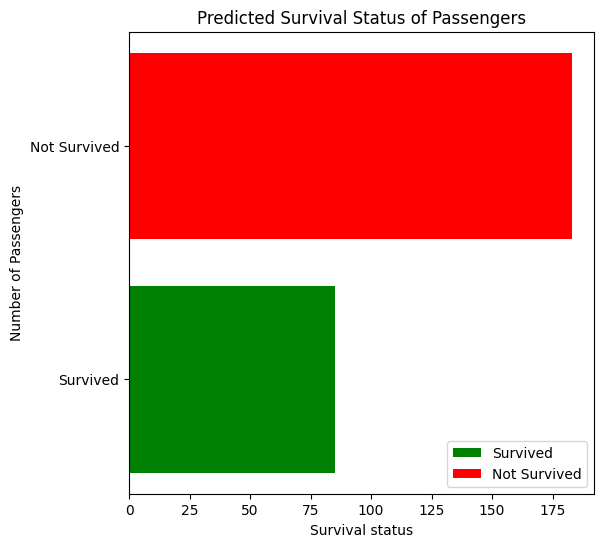

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of survived and not survived passengers
survived_count = final["Survived"].value_counts()[1]
not_survived_count = final["Survived"].value_counts()[0]

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.barh("Survived", survived_count, color="green", label="Survived")
plt.barh("Not Survived", not_survived_count, color="red", label="Not Survived")

# Add labels and title
plt.xlabel("Survival status")
plt.ylabel("Number of Passengers")
plt.title("Predicted Survival Status of Passengers")

# Add legend
plt.legend()

# Show the plot
plt.show()

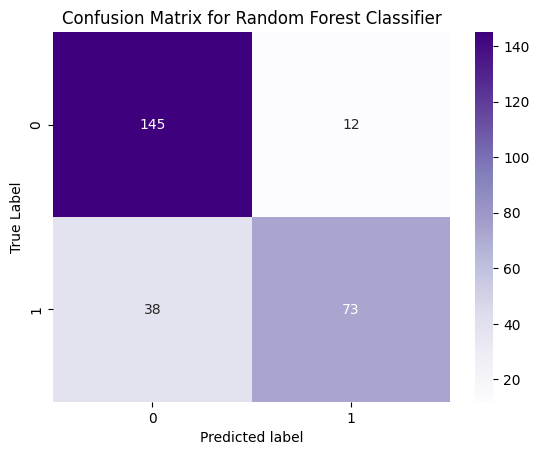

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
labels=sorted(ytest.unique())
cm=confusion_matrix(ytest,pred,labels=labels)
sns.heatmap(cm,annot=True,cmap='Purples',fmt="d",xticklabels=labels,yticklabels=labels)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Classification Report
print("Random Forest")
print(classification_report(ytest,pred))

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.86      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



Text(0, 0.5, 'Predictions ')

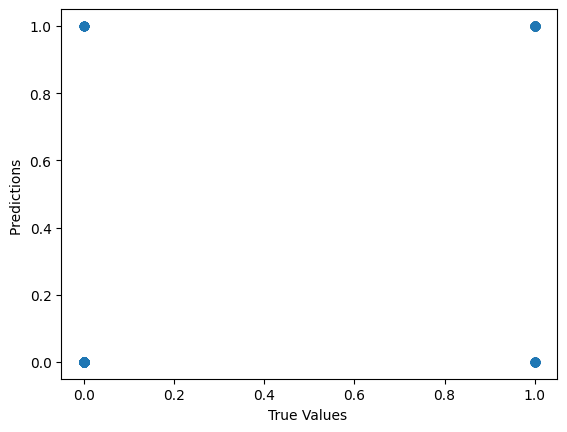

In [ ]:
plt.scatter(ytest,pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')